In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [6]:
import os
os.listdir()

['__notebook_source__.ipynb']

In [7]:
import pandas as pd
import numpy as np

In [8]:
#lets load the data
data = pd.read_csv('../input/lego-minifigures-classification/index.csv')
data.head(10)

,path,class_id
0,marvel/0001/001.jpg,1
1,marvel/0001/002.jpg,1
2,marvel/0001/003.jpg,1
3,marvel/0001/004.jpg,1
4,marvel/0001/005.jpg,1
5,marvel/0001/006.jpg,1
6,marvel/0001/007.jpg,1
7,marvel/0001/008.jpg,1
8,marvel/0001/009.jpg,1
9,marvel/0001/010.jpg,1


In [9]:
#lets check abt the data df
data.shape

(342, 2)

In [13]:
data['class_id'].value_counts()

5     12
6     12
7     12
27    12
26    12
9     12
18    11
20    11
8     11
19    11
22    11
21    11
2     10
3     10
4     10
1     10
23    10
31    10
30    10
29    10
28    10
25    10
24    10
34     9
35     9
15     8
16     8
17     8
32     8
33     8
10     8
11     7
12     7
13     7
14     7
Name: class_id, dtype: int64

In [15]:
data.isnull().sum()

path        0
class_id    0
dtype: int64

In [22]:
import cv2
import matplotlib.pyplot as plt

we dont have null values..good for us

In [28]:
for path in data['path']:
    img = cv2.imread(str('../input/lego-minifigures-classification'+'/'+path))
    #plt.imshow(img)
    print(np.array(img))
    print(np.array(img)/255)
    break

[[[ 68  85  94]
  [ 68  85  94]
  [ 70  87  96]
  ...
  [123 140 143]
  [121 138 141]
  [120 137 140]]

 [[ 71  89  96]
  [ 71  89  96]
  [ 73  90  99]
  ...
  [124 141 144]
  [123 140 143]
  [123 140 143]]

 [[ 76  94 101]
  [ 75  93 100]
  [ 78  95 104]
  ...
  [125 142 145]
  [125 142 145]
  [125 142 145]]

 ...

 [[ 60  70  80]
  [ 51  61  71]
  [ 47  58  66]
  ...
  [120 132 134]
  [126 139 141]
  [117 130 132]]

 [[ 56  66  76]
  [ 46  56  66]
  [ 42  53  61]
  ...
  [121 134 136]
  [117 130 132]
  [121 134 136]]

 [[ 49  59  69]
  [ 43  53  63]
  [ 46  57  65]
  ...
  [113 126 128]
  [116 128 132]
  [118 130 134]]]
[[[0.26666667 0.33333333 0.36862745]
  [0.26666667 0.33333333 0.36862745]
  [0.2745098  0.34117647 0.37647059]
  ...
  [0.48235294 0.54901961 0.56078431]
  [0.4745098  0.54117647 0.55294118]
  [0.47058824 0.5372549  0.54901961]]

 [[0.27843137 0.34901961 0.37647059]
  [0.27843137 0.34901961 0.37647059]
  [0.28627451 0.35294118 0.38823529]
  ...
  [0.48627451 0.5529411

In [75]:
#lets load all the images
X = []
y = []

for path in data['path']:
    img = cv2.imread(str('../input/lego-minifigures-classification'+'/'+path))
    #print(img)
    resized_img = cv2.resize(img,(224,224))
    #print(resized_img)
    scaled_img = np.array(resized_img)/255
    X.append(scaled_img)
    
y = np.array(data['class_id'])-1

In [76]:
X = np.array(X)
y = np.array(y)

In [77]:
X[0]

array([[[0.2745098 , 0.34117647, 0.37254902],
        [0.28235294, 0.34901961, 0.38823529],
        [0.28235294, 0.34901961, 0.38431373],
        ...,
        [0.48235294, 0.54901961, 0.56078431],
        [0.48235294, 0.54901961, 0.56470588],
        [0.47843137, 0.54509804, 0.55686275]],

       [[0.29411765, 0.36470588, 0.39215686],
        [0.31372549, 0.38431373, 0.41176471],
        [0.30980392, 0.37647059, 0.41176471],
        ...,
        [0.48627451, 0.55294118, 0.56470588],
        [0.49411765, 0.56078431, 0.57254902],
        [0.49019608, 0.55686275, 0.56862745]],

       [[0.32156863, 0.39215686, 0.41960784],
        [0.31372549, 0.38431373, 0.41176471],
        [0.30588235, 0.37647059, 0.40392157],
        ...,
        [0.48627451, 0.55294118, 0.56470588],
        [0.50196078, 0.56862745, 0.58039216],
        [0.49019608, 0.55686275, 0.56862745]],

       ...,

       [[0.23529412, 0.27058824, 0.30980392],
        [0.2627451 , 0.29803922, 0.3372549 ],
        [0.23921569, 0

In [78]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [79]:
print(f'train size : {x_train.shape}')
print(f'test size : {x_test.shape}')

train size : (256, 224, 224, 3)
test size : (86, 224, 224, 3)


In [47]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,Sequential


In [49]:
data_augmentation = Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal',input_shape = (512,512,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
])

In [67]:
print(len(data['class_id'].value_counts()))
print(len(data['class_id'].unique()))

35
35


In [51]:
num_classes = len(data['class_id'].value_counts())

In [60]:
#model building
model = Sequential([
    data_augmentation,
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes),
])

In [61]:
model.compile(
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
optimizer = 'adam',
metrics = ['accuracy'],
)

In [68]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50,verbose=2)

Epoch 1/50
8/8 - 2s - loss: 0.6175 - accuracy: 0.8125 - val_loss: 3.9461 - val_accuracy: 0.3721
Epoch 2/50
8/8 - 2s - loss: 0.7501 - accuracy: 0.8047 - val_loss: 4.0491 - val_accuracy: 0.3256
Epoch 3/50
8/8 - 1s - loss: 0.7094 - accuracy: 0.8125 - val_loss: 3.5868 - val_accuracy: 0.3605
Epoch 4/50
8/8 - 1s - loss: 0.6729 - accuracy: 0.8047 - val_loss: 5.1559 - val_accuracy: 0.3721
Epoch 5/50
8/8 - 1s - loss: 0.5884 - accuracy: 0.8516 - val_loss: 3.7668 - val_accuracy: 0.4070
Epoch 6/50
8/8 - 1s - loss: 0.6140 - accuracy: 0.8516 - val_loss: 4.7507 - val_accuracy: 0.3953
Epoch 7/50
8/8 - 1s - loss: 0.5354 - accuracy: 0.8320 - val_loss: 4.0697 - val_accuracy: 0.3837
Epoch 8/50
8/8 - 2s - loss: 0.5134 - accuracy: 0.8438 - val_loss: 3.7924 - val_accuracy: 0.3721
Epoch 9/50
8/8 - 2s - loss: 0.3915 - accuracy: 0.9023 - val_loss: 4.5237 - val_accuracy: 0.3953
Epoch 10/50
8/8 - 1s - loss: 0.2875 - accuracy: 0.9141 - val_loss: 4.6478 - val_accuracy: 0.3721
Epoch 11/50
8/8 - 1s - loss: 0.3031 - a

In [70]:
#lets try transfer learning methods
model_1 = tf.keras.applications.DenseNet121()
base_input = model_1.layers[0].input
base_output = model_1.layers[-2].output
output = layers.Dense(num_classes,activation='softmax')(base_output)
new_model = keras.Model(inputs = base_input,outputs = output)
print(new_model.summary())

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_2 (ZeroPadding2D (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d_2[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
______________________________________________________________________________________________

In [81]:
new_model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),optimizer ='adam',metrics=['accuracy'])

In [82]:
new_model.fit(x_train,y_train,epochs = 50,validation_data=(x_test,y_test))

Epoch 1/50
8/8 [==============================] - 15s 584ms/step - loss: 3.4105 - accuracy: 0.2084 - val_loss: 5.9753 - val_accuracy: 0.0233
Epoch 2/50
8/8 [==============================] - 2s 220ms/step - loss: 0.5639 - accuracy: 0.9125 - val_loss: 4.9046 - val_accuracy: 0.0581
Epoch 3/50
8/8 [==============================] - 2s 217ms/step - loss: 0.0992 - accuracy: 0.9934 - val_loss: 4.3115 - val_accuracy: 0.1047
Epoch 4/50
8/8 [==============================] - 2s 216ms/step - loss: 0.0403 - accuracy: 0.9986 - val_loss: 3.9561 - val_accuracy: 0.1628
Epoch 5/50
8/8 [==============================] - 2s 217ms/step - loss: 0.0162 - accuracy: 1.0000 - val_loss: 3.7385 - val_accuracy: 0.1628
Epoch 6/50
8/8 [==============================] - 2s 217ms/step - loss: 0.0097 - accuracy: 1.0000 - val_loss: 3.1353 - val_accuracy: 0.2326
Epoch 7/50
8/8 [==============================] - 2s 216ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 2.5183 - val_accuracy: 0.3256
Epoch 8/50
8/8 [===

minifigure name : SPIDER-MAN


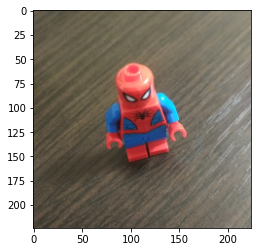

In [97]:
image = cv2.imread('../input/lego-minifigures-classification/marvel/0001/001.jpg')
# read the image 
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, dsize=(224,224))/255
plt.imshow(image)
image = np.reshape(image,(1,224,224,3))
ans = new_model.predict(image).argmax()
ans = ans+1
metadata = pd.read_csv('../input/lego-minifigures-classification/metadata.csv')
name = metadata['minifigure_name'][metadata['class_id']==ans].iloc[0]
print(f'minifigure name : {name}')

In [86]:
metadata = pd.read_csv('../input/lego-minifigures-classification/metadata.csv')
metadata['minifigure_name'][metadata['class_id']==1].iloc[0]

'SPIDER-MAN'

In [84]:
metadata

,class_id,lego_ids,lego_names,minifigure_name
0,1,[76115],['Spider Mech vs. Venom'],SPIDER-MAN
1,2,[76115],['Spider Mech vs. Venom'],VENOM
2,3,[76115],['Spider Mech vs. Venom'],AUNT MAY
3,4,[76115],['Spider Mech vs. Venom'],GHOST SPIDER
4,5,[75208],"[""Yoda's Hut""]",YODA
5,6,[75208],"[""Yoda's Hut""]",LUKE SKYWALKER
6,7,[75208],"[""Yoda's Hut""]",R2-D2
7,8,[75199],"[""General Grievous' Combat Speeder""]",MACE WINDU
8,9,[75199],"[""General Grievous' Combat Speeder""]",GENERAL GRIEVOUS
9,10,[75264],"[""Kylo Ren's Shuttle Microfighter""]",KYLO REN
